#  Лабораторная работа №2. Отчёт о проделанных экспериментах.

Для решения задачи машинного перевода с русского языка на английский была использована Encoder-Decoder модель.

В ходе работы было проведено четыре эксперимента, в ходе которых были получены модели значение метрики качества которых (BLEU) было удовлетворительным (2 эксперимента BLEU * 100 > 20 и 2 эксперимента BLEU * 100 > 30). 

## Эксперимент №1.

В первом эксперименте в качестве RNN для энкодера и декодера была взята модель GRU и добавлен механизм Attention (аналог Bahdanau с немного упрощенным вычислением score).
Эмбеддинги для декодера и энкодера сгенерированы случайно и являются обучаемыми параметрами.
В качестве токенайзера взяты токенайзеры из библиотеки spacy.

Optimizator: Adam.

Criterion: CrossEntropyLoss.

Основные параметры:
```
dataset:
  train_size: 0.8
  val_size: 0.15
  test_size: 0.05
model:
  enc_emb_dim: 128
  dec_emb_dim: 128
  enc_hid_dim: 256
  dec_hid_dim: 256
  attn_dim: 128
  enc_dropout: 0.5
  dec_dropout: 0.5
train:
  batch_size: 16
  n_epoch: 40
  device: cuda
  learning_rate: 0.0008
preprocessing:
  spacy_tokenizer:
    ru: ru_core_news_lg
    en: en_core_web_lg
```

Всего обучаемых параметров модели: 10,954,079.

Ниже представлены графики отражающие значения функции потерь для train, validation.

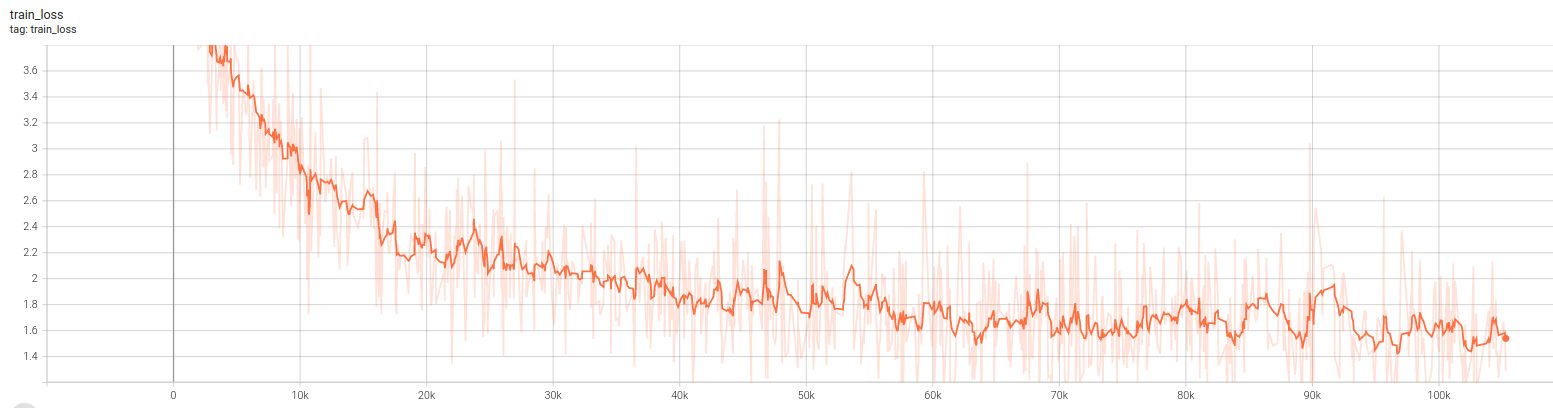

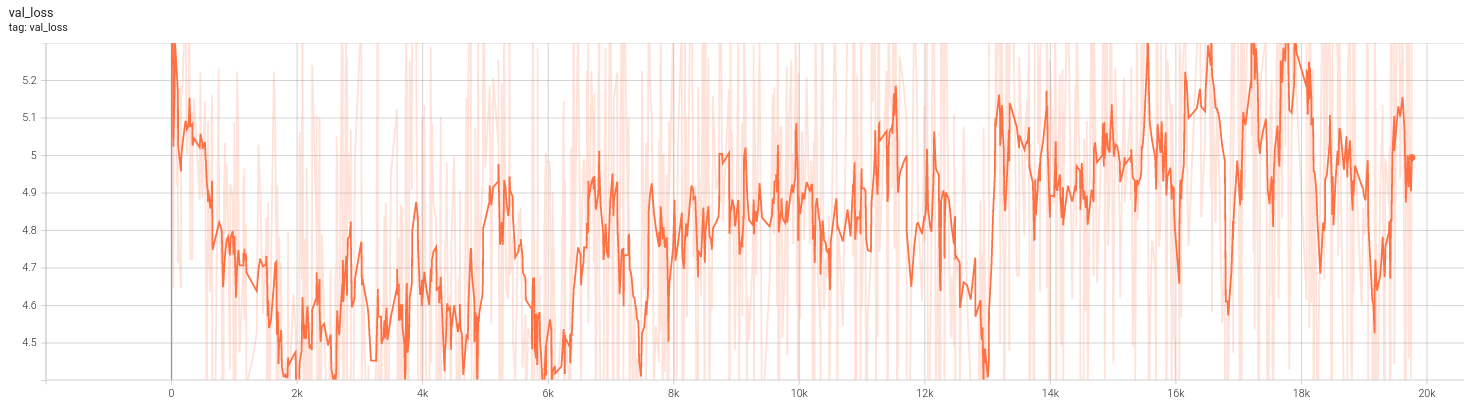

Из графиков видно, что модель переобучилась. При этом  train_loss значительно меньше val_loss на всех этапах обучения.

Значение BLEU: 22.662638955280002

#### Показатели обучения
```
Время обучения: 9236 секунд.
Количество батчей на обучении: 125060 = 105300 (train) + 19760 (validation)
Количество эпох: 40
Размер батча: 16
Средняя скорость обучения: 8665,916 примеров в секунду.
```

#### Показатели inference

Примеры хороших переводов:


```
origin: в ресторане отеля подают завтрак , обед и ужин , а в сувенирном магазине можно приобрести продукты , подарки и изделия .

translated: breakfast , lunch and dinner are served at the in - house restaurant . basic groceries , gifts and can be bought at the souvenir shop .

generated: breakfast is lunch , lunch and dinner are served at the property , and groceries , gifts and and souvenir shop . bought on site . souvenir shop
```


```
origin: в некоторых вариантах размещения есть терраса и / или балкон . в числе стандартных удобств телевизор с плоским экраном , обеденная зона и кухня с духовкой .

translated: the accommodation comes with a flat - screen tv . some units have a terrace and/or balcony . there is also a dining area and a kitchen fitted with an oven .

generated: some units have a terrace and/or balcony . there is a flat - screen tv and a dining area . there is also a kitchen . units . units . units . units

```

Примеры плохих переводов:

```
origin: кроме того , предоставляются полотенца и постельное белье .

translated: towels and bed linen are featured .

generated: . . . . . . . . . . . . . . . . . . . . . . . . . . .
```


```
origin: до морского парка можно доехать на автомобиле примерно за 10 минут .

translated: sea park is just over a 10 - minute car journey away .

generated: the and and and and and . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
```

Inference speed: 1,386508776 batch/sec

## Эксперимент №2.

В отличие от первого эксперимента были взяты предобученные веса fasttext для эмбеддингов энкодера и декодера. При этом размер эмбеддингов был увеличен до 300.

Доля слов, для которых нашлись слова в fasttext для обоих языков составляет примерно 75%.

Всего обучаемых параметров модели: 13,987,966.

Основные параметры:

```
dataset:
  train_size: 0.8
  val_size: 0.15
  test_size: 0.05
model:
  enc_emb_dim: 300
  dec_emb_dim: 300
  enc_hid_dim: 256
  dec_hid_dim: 256
  attn_dim: 256
  enc_dropout: 0.5
  dec_dropout: 0.5
  pretrained_embedding: fasttext
  rnn_type: gru
  bidirectional: false
train:
  batch_size: 16
  n_epoch: 40
  device: cuda
  learning_rate: 0.0008
preprocessing:
  spacy_tokenizer:
    ru: ru_core_news_lg
    en: en_core_web_lg
```

#### Показатели обучения
```
Время обучения: 9360 секунд.
Количество батчей на обучении: 125060 = 105300 (train) + 19760 (validation)
Количество эпох: 40
Размер батча: 16
Средняя скорость обучения: 8551,111 примеров в секунду.
```

Значение BLEU: 22.445998609025253

Ниже представлены графики отражающие значения функции потерь для train, validation.

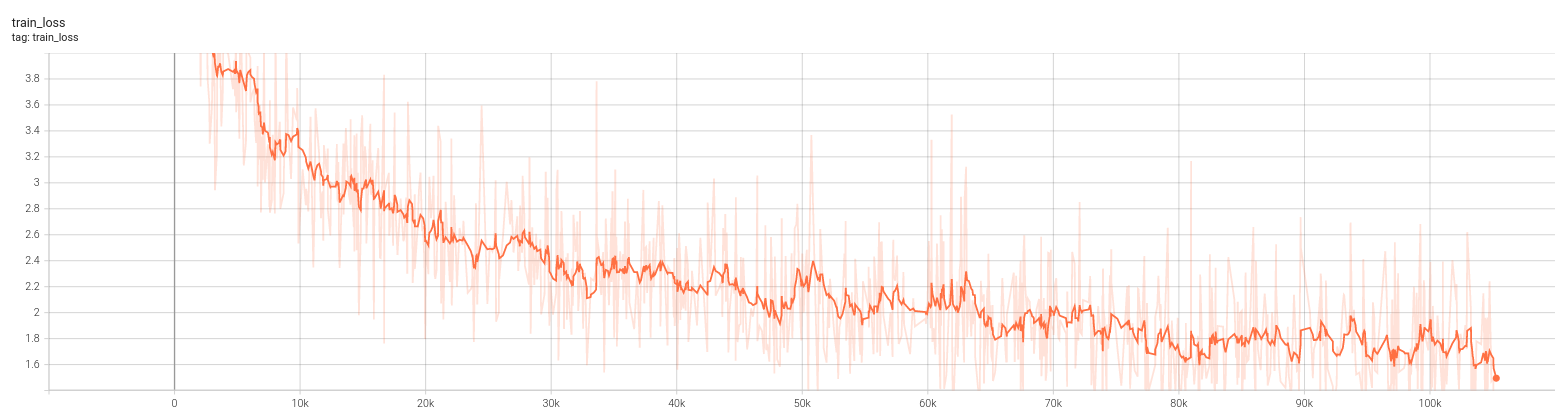

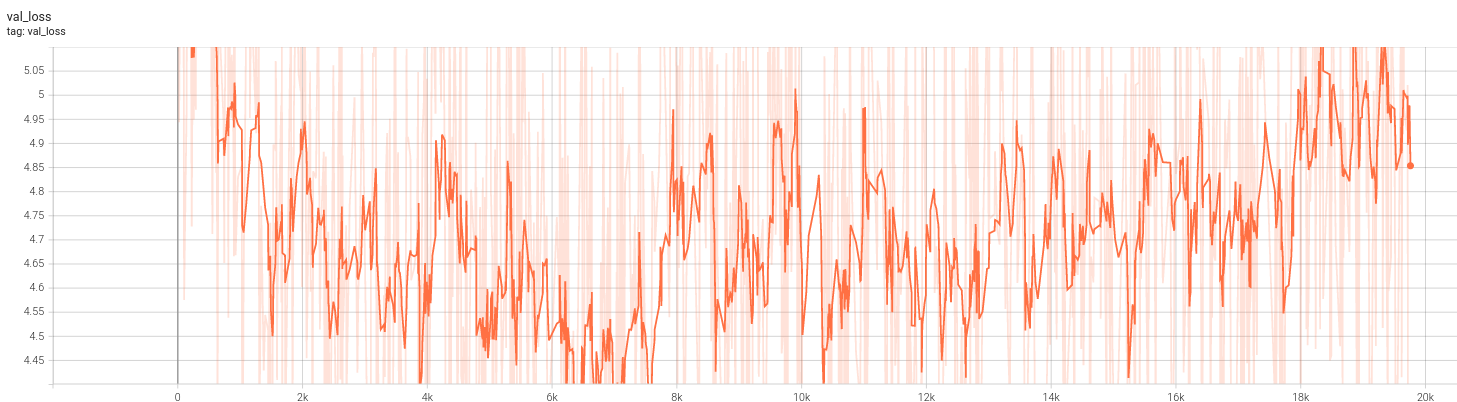

Переобучение немного замедлилось. При этом результат не улучшился.

#### Примеры хороших переводов:
```
origin: на полностью оборудованной кухне имеется посудомоечная машина и микроволновая печь .

translated: there is a fully equipped kitchen with a dishwasher and a microwave .

generated: there is a fully equipped kitchen with a dishwasher and a microwave . .
```

Здесь перевод даже лучше предоставленного (так как oven - духовая печь, а не плита):

```
origin: кроме того , в вашем распоряжении обеденный стол и мини - кухня с плитой и микроволновой печью .

translated: there is also a dining table and a kitchenette with an oven and microwave .

generated: there is also a dining table and a kitchenette with a stove and microwave . . . .
```

#### Примеры плохих переводов:
```
origin: комплекс black rock traditional rooms расположен в традиционном поселке .

translated: black rock traditional rooms offers accommodation in the traditional settlement of emporio .

generated: the rural rural <unk> are located in the traditional stone - style .</unk>
```

```
origin: отель удобно расположен для стадиона paris ( ) , замка и зоопарка , и парижского диснейленда .

translated: the hotel is conveniently situated to reach paris stadium ( ) , vincennes castle and zoo , horse tracks and disneyland resort paris .

generated: the hotel is <unk> is <unk> ( <unk> ) , <unk> <unk> <unk> <unk> , <unk> <unk> <unk> , and <unk> <unk> <unk> .</unk></unk></unk></unk></unk></unk></unk></unk></unk></unk></unk></unk></unk>
```

Inference speed: 1,3603 batch/sec

# Эксперимент № 3.

В третьем эксперименте в отличие от второго эксперимента вместо GRU был использован 2-слойный bidirectional LSTM в качестве энкодера и однослойный LSTM в качестве декодера.

Всего обучаемых параметров модели: 16,270,939.

Основные параметры:
```
dataset:
  train_size: 0.8
  val_size: 0.15
  test_size: 0.05
model:
  enc_emb_dim: 128
  dec_emb_dim: 128
  enc_hid_dim: 256
  dec_hid_dim: 256
  attn_dim: 128
  enc_dropout: 0.5
  dec_dropout: 0.5
  pretrained_embedding: fasttext
  rnn_type: lstm
  bidirectional: true
train:
  batch_size: 16
  n_epoch: 40
  device: cuda
  learning_rate: 0.0008
preprocessing:
  spacy_tokenizer:
    ru: ru_core_news_sm
    en: en_core_web_sm
```

#### Показатели обучения
```
Время обучения: 10416 секунд.
Количество батчей на обучении: 125060 = 105300 (train) + 19760 (validation)
Количество эпох: 40
Размер батча: 16
Средняя скорость обучения: 7684,179 примеров в секунду.
```

BLEU: 30.743813680035633

Ниже представлены графики отражающие значения функции потерь для train, validation.

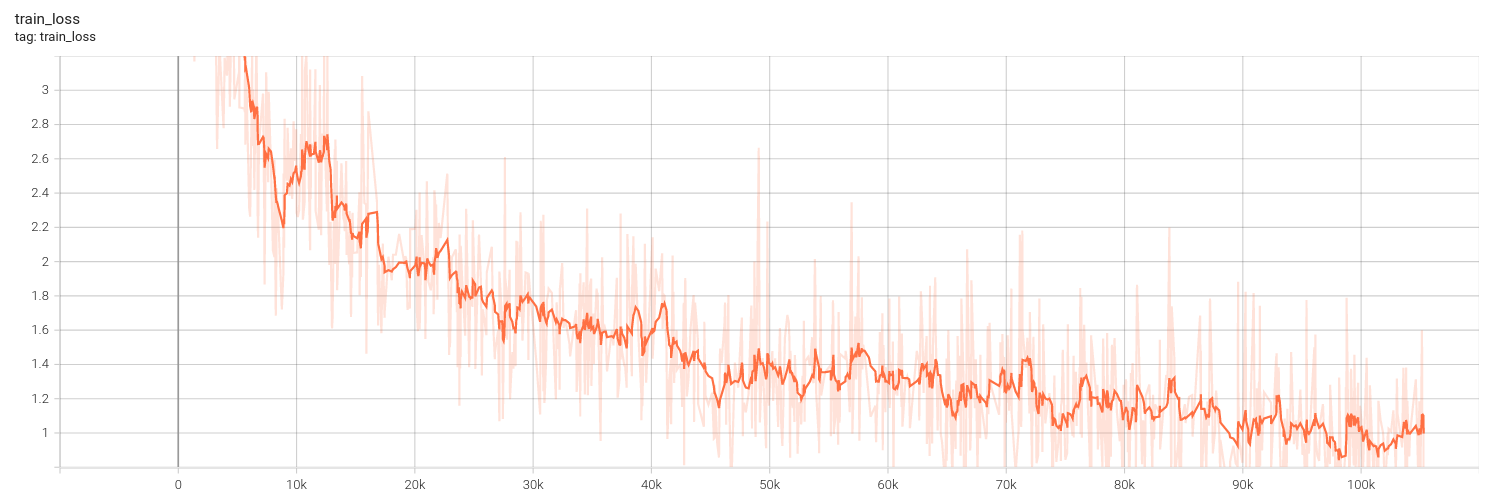

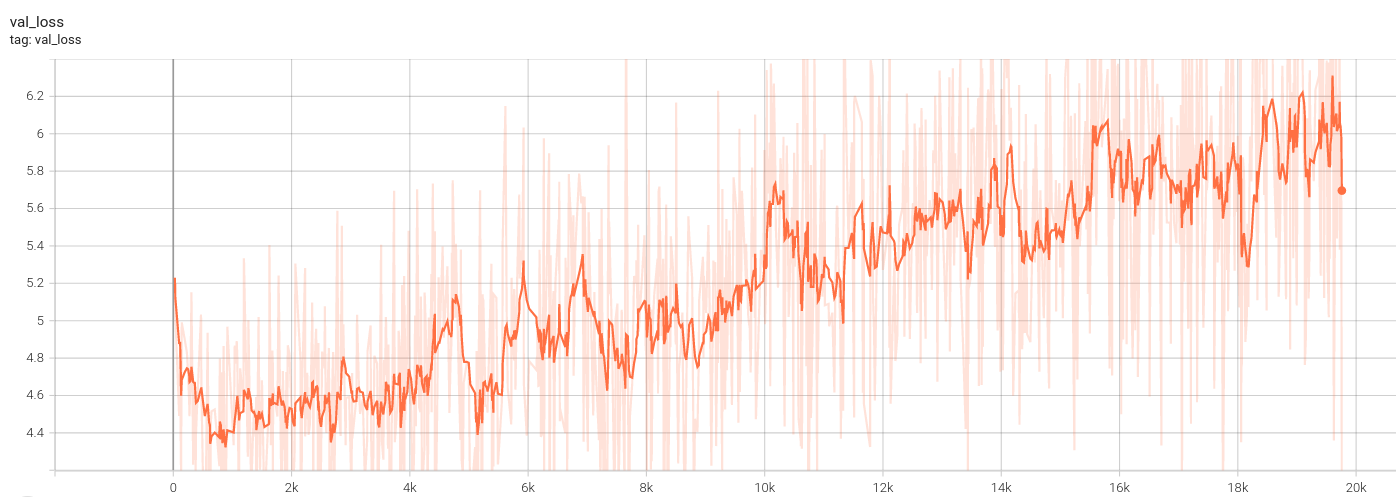

Как видно из графиков модель очень сильно переобучилась, что привело к достаточно высокому значению метрики BLEU из-за однобразия текстов в тренировочной и тестовой выборках.

При этом обучение модели шло быстрее по сравнение с 1 и 2 экспериментами.

#### Примеры хороших переводов:

```
origin: все виллы в отеле the marbella club оформлены в индивидуальном стиле , обставлены современной мебелью и располагают полностью оснащенной кухней и собственным балконом .

translated: each individually decorated villa at the marbella club provides contemporary furnishings , fully equipped kitchens and private balconies .

generated: each individually decorated villa at the marbella club provides modern furnishings furnishings and fully equipped kitchens and private balconies .
```

```
origin: гости мотеля cal expo 6 могут провести прекрасный день в аквапарке « рейджинг - уотерс » .

translated: guests at the cal expo motel 6 can easily spend the day at raging waters water park .

generated: guests at the cal expo motel 6 can spend the day at raging waters spa .
```

#### Примеры плохих переводов:

```
origin: гостевой дом расположен в 500 метрах от станции метро hongik university ( линия 2 , линия аэропорт экспресс и линия - ) и района — центра - музыки , искусства и развлечений . к услугам гостей бесплатный доступ в интернет .

translated: offering complimentary internet access , guesthouse is situated within 500 metres of hongik university subway station ( line 2 , airport railroad and gyeongui - line ) and hongdae ’s music , street arts and entertainment scene .

generated: offering complimentary internet access to the property , line <unk> , ) , <unk> <unk> ( line 2 ) , and the airport ( line 2 ) airport ) and gyeongui line . <unk> line <unk> ) . <unk> line <unk> )</unk></unk></unk></unk></unk></unk></unk>
```

```
origin: расстояние до залива орхус - составляет 1 км .

translated: the shores of aarhus are 1 km away .

generated: the <unk> at <unk> <unk> is 1 km away . .</unk></unk></unk>
```

Inference speed: 1,499360031 batch/sec

# Эксперимент 4.

В данном эксперименте были использованы те же архитектурные решения, что и в 3. 
За исключением:

    - Использование предобученного на русском языке BERT (deeppavlov RuBert-cased-768) для получения эмбеддингов в энкодере (код был вынесен из энкодера в Seq2Seq класс). Параметры BERT заморожены.
    
    - Полученные эмбеддинги пропускались через дополнительный линейный слой перед попаданием в энкодер (для уменьшения числа параметров энкодера).
    
    - Механизм attention переписан, чтобы полностью соответстовать Bahdanau attention)
    
    - В энкодере используется двунаправленный однослойный LSTM.
    
    - Увеличены размерности эмбеддингов поступающих в энкодер и декодер, но уменьшены размерности скрытых состояний.

Основные параметры:

```
dataset:
  train_size: 0.8
  val_size: 0.15
  test_size: 0.05
model:
  enc_emb_dim: 256
  dec_emb_dim: 256
  enc_hid_dim: 128
  dec_hid_dim: 128
  attn_dim: 128
  enc_dropout: 0.5
  dec_dropout: 0.5
  pretrained_embedding: none
  rnn_type: lstm
  bidirectional: true
train:
  batch_size: 16
  n_epoch: 40
  device: cuda
  learning_rate: 0.0008
preprocessing:
  spacy_tokenizer:
    ru: ru_core_news_sm
    en: en_core_web_sm
  bert_emb: true

```

#### Показатели обучения
```
Время обучения: 22714 секунд.
Количество батчей на обучении: 125060 = 105300 (train) + 19760 (validation)
Количество эпох: 40
Размер батча: 16
Средняя скорость обучения: 3523,747 примеров в секунду.
```

Всего обучаемых параметров модели:  26,801,625.

BLEU: 30.340193128790098

Ниже представлены графики отражающие значения функции потерь для train, validation.

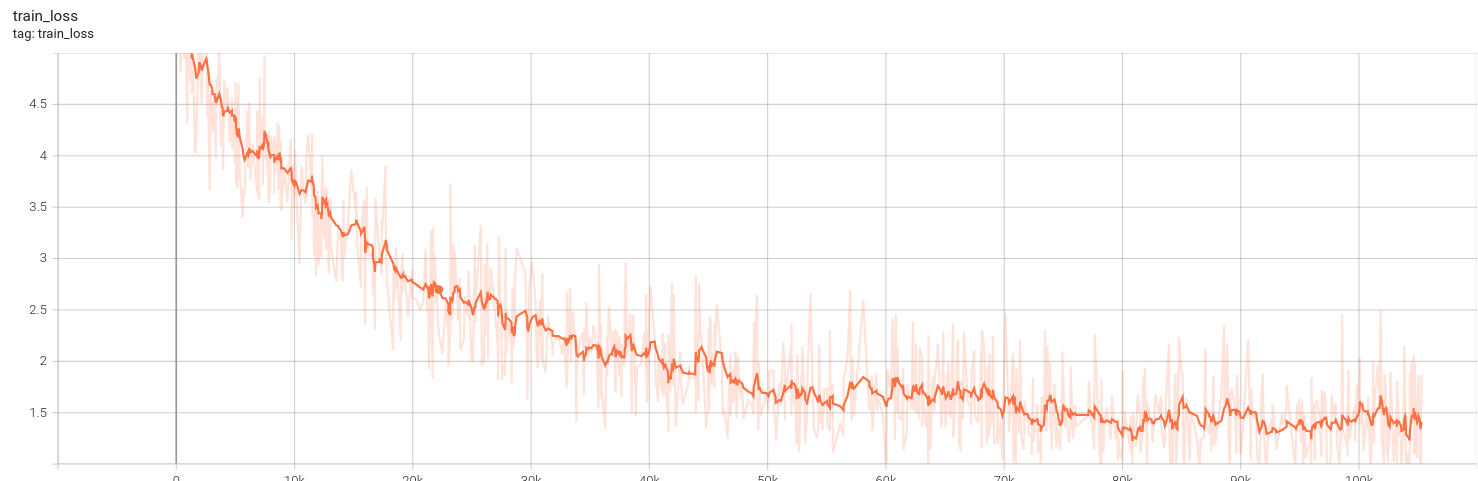

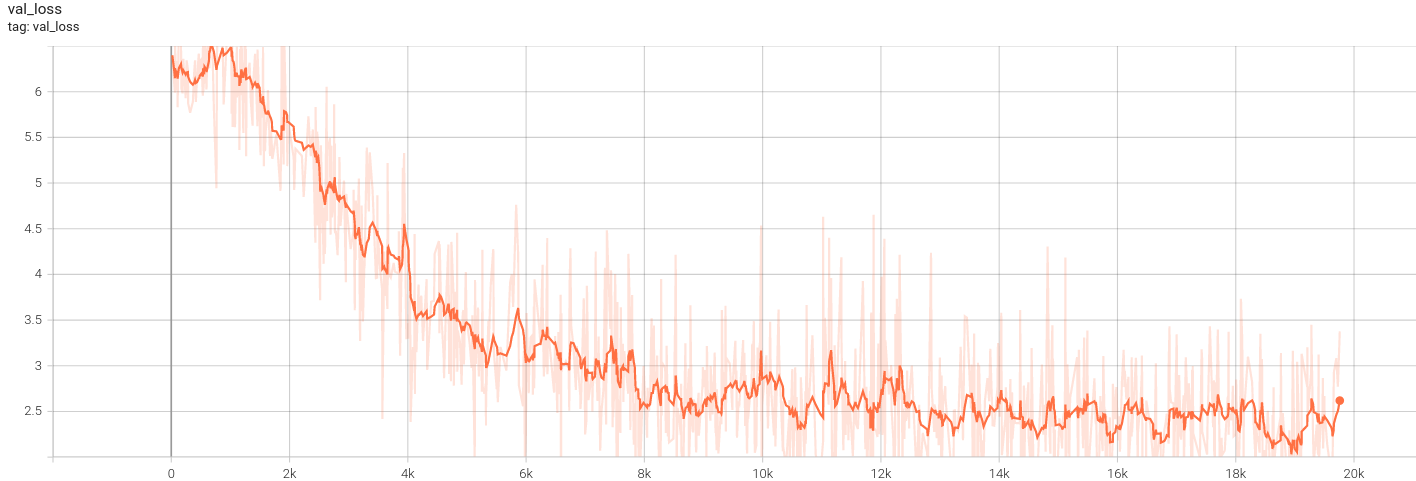

Модель не переобучилась, что видно из графиков выше.

Использование BERT существенно сказалось на скорости использования модели.

Inference speed: 0,337066074 batch/sec

#### Примеры хороших переводов:

```
origin: по утрам гостям отеля sb ciutat de tarragona предлагается завтрак « шведский стол » с широким выбором блюд .  ресторан специализируется на средиземноморской кухне .

translated: a varied buffet breakfast is offered at the hotel sb ciutat de tarragona , and the restaurant serves mediterrranean cuisine .

generated: a varied buffet breakfast is offered at the hotel - site de restaurant , and the restaurant serves mediterrranean cuisine . . . . . .

```

```
origin: в ресторане visit подают блюда тайской и европейской кухни .

translated: guests can enjoy thai and european cuisines served at visit restaurant .

generated: guests can enjoy thai and european cuisines served at visit restaurant .
```

#### Примеры плохих переводов:
```
origin: в собственном винном погребе гостевого дома проводится дегустация вин .

translated: it offers wine tasting in the private wine cellar .

generated: it offers bicycle tasting in the with wine cellar . .
```

```
origin: кроме того , реставраторы сохранили аутентичный бассейн для стока дождевой воды .

translated: it has also retained the villa 's original impluvium .

generated: free wifi is available . . . . .
```